# Exploring Musical Modes

Here I explore some musical **modes**: ionian, dorian, phrygian, etc.

I think about things like "distances" between modes.
Also the idea of "learning" a mode - as notes in a mode are revealed over time.
Mostly I think this is just fun!
But I think there are some interesting mathematical ideas.
And finally, it would be exciting to see how these ideas might manifest in the form of a song.

TODO:
- Create a way of listening to the results. For example, when looking at the distance matrix, clicking on an element could play each of the two modes back and forth to compare / contrast them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import ipywidgets as widgets
# import bqplot as bq
# from bqplot import pyplot as plt

from IPython.display import display
import seaborn as sns
import copy

## Notes.

The piano has keys that you can press.
When you press one of them near the middle called "middle C", it makes a certain sound.
When you press a different one, it makes a different sound.
Each of these different sounds corresponds to a different **note**.
The more specific name for "middle C" is $C_4$ - the fourth C counting from the left on the piano.

## Intervals.

Intervals are distances between notes.
For example, the distance between C and E is an interval called a "major third".
The distance between G and B is also a major third, even though the notes involved are entirely different.

>An interval has to do with note distances or relationships.

## Introduction to musical modes.

The easiest way to do this is to think about the white notes on the piano.
If you start at C and go up, D, E, F, G, A, B, C, you have played a C major scale.
Also, this is the ionian mode (starting on C).
This is the mode you use in the song 
<a href="https://www.youtube.com/watch?v=Qy9cj-zwbVY" target="_blank">"Doe a deer, a female deer..."</a>
.

If you play those very same notes, but starting on D and go up, E, F, G, A, B, C, D, it will sound different.
It sounds different not only because it's higher in pitch, but the quality is different.
This is a minor scale.
In particular, this is the dorian mode.
You can hear this mode in the song 
<a href="https://www.youtube.com/watch?v=-Jj4s9I-53g" target="_blank">"Scarborough Fair"</a>
.

We chose to start our ionian mode example on C while we started our dorian mode example on D.

We could also choose to play the dorian mode starting on C instead of D.
To do this we play C, D, E flat, F, G, A, B flat, C.

>The starting note does not define the mode. A mode is a sequence of relationships between notes - a sequence of intervals.

We can hear the other modes by starting on other white notes and going up (staying on white notes).
Starting on E gives phrygian, on F gives lydian, on G gives mixolydian, on A gives aeolian, and on B gives locrian.

## Defining modes in terms of pitch relationships.

Here I want to talk about steps on the piano (half-steps and whole-steps) instead of frequencies.

We can understand the ionian mode as a sequence of steps.
You start on some pitch, let's say C.
Then you go up a whole step to D, then another whole step to E.
Then a half step to F, then three whole steps to G, A, and B, then finally a half step to C.

Let's ignore the notes and focus on the steps.
Then the sequence that defines the ionian mode is: W, W, H, W, W, W, H.

Similarly, the sequence that defines the dorian mode is: W, H, W, W, W, H, W.

With a little thought you can see that the other modes can be obtained by cyclically permuting the steps that define the ionian mode.

Note: It would be interesting to think about all of this in terms of frequencies too, but you might have to start thinking about different temperaments and their impacts.

In [2]:
mode_names = ['ionian', 'dorian', 'phrygian', 'lydian', 'mixolydian', 'aeolian', 'locrian']

mode_df = pd.DataFrame(mode_names, columns=['name'])

In [3]:
ionian_pattern = 'WWHWWWH'

def cycle_pattern(pattern, shift):
    return pattern[shift:] + pattern[:shift]
    
mode_df['pattern'] = ionian_pattern

mode_df['pattern'] = mode_df.apply(lambda row: cycle_pattern(row.pattern, row.name), axis=1)

mode_df

,name,pattern
0,ionian,WWHWWWH
1,dorian,WHWWWHW
2,phrygian,HWWWHWW
3,lydian,WWWHWWH
4,mixolydian,WWHWWHW
5,aeolian,WHWWHWW
6,locrian,HWWHWWW


## Let's think about the distance between the modes.

Many modes are similar.
For example, C ionian is very similar to C lydian.
The notes of C ionian are : C, D, E, F, G, A, B, C.
The notes of C lydian are : C, D, E, F sharp, G, A, B, C.
Only one note is different.
The pattern representation is different in the third and fourth symbols, so the real similarity is not as clear as it could be.
It is more intuitive to consider the "cumulative pattern".

In [4]:
def pattern_to_int_pattern(pattern):
    d = {'H':1, 'W':2}
    # First map to integers
    return  list(map(lambda char: d[char], pattern))

def int_pattern_to_cumulative(int_pattern):
    # This version prepends a zero.
    # return np.append([0], np.cumsum(int_pattern))
    # This version has no initial zero.
    return np.cumsum(int_pattern)
    
mode_df['int pattern'] = mode_df['pattern'].apply(pattern_to_int_pattern)
mode_df['cumul pattern'] = mode_df['int pattern'].apply(int_pattern_to_cumulative)

Let's look at the cumulative patterns of ionian and dorian.

In [5]:
mode_df.loc[mode_df['name'].isin(['ionian', 'dorian']), ['name','cumul pattern']]
#mode_df['cumul pattern'][mode_df['name'].isin(['ionian', 'dorian'])]
#mode_df.query("name==['ionian', 'dorian']")[['name', 'cumul pattern']]

,name,cumul pattern
0,ionian,"[2, 4, 5, 7, 9, 11, 12]"
1,dorian,"[2, 3, 5, 7, 9, 10, 12]"


Here we can see that the notes of the two scales (given the same starting note) are the same except for two notes - 4 vs 3 and 11 vs 10.
This corresponds to a major 3rd vs minor 3rd and major 7th vs dominant 7th.

One measure of distance is just the number of notes that are different.
In that sense, the distance here is 2.

Let's use this notion of distance to compute and visualize the distances between each pair of modes.

In [6]:
from scipy.spatial.distance import squareform, pdist

In [7]:
# One might call the distance metric on a set of dataframe columns.
# Here our vector data is all within one column.
# Unpacking a np.array of np.arrays can be done with np.stack - a handy trick.
cpats = np.stack(mode_df['cumul pattern'].values)

In [8]:
pairwise_df = pd.DataFrame(squareform(pdist(cpats, metric='cityblock')), columns=mode_df['name'], 
                           index=mode_df['name'])
pairwise_df

name,ionian,dorian,phrygian,lydian,mixolydian,aeolian,locrian
name,,,,,,,
ionian,0.0,2.0,4.0,1.0,1.0,3.0,5.0
dorian,2.0,0.0,2.0,3.0,1.0,1.0,3.0
phrygian,4.0,2.0,0.0,5.0,3.0,1.0,1.0
lydian,1.0,3.0,5.0,0.0,2.0,4.0,6.0
mixolydian,1.0,1.0,3.0,2.0,0.0,2.0,4.0
aeolian,3.0,1.0,1.0,4.0,2.0,0.0,2.0
locrian,5.0,3.0,1.0,6.0,4.0,2.0,0.0


(0.0, 7.0, 7.0, 0.0)

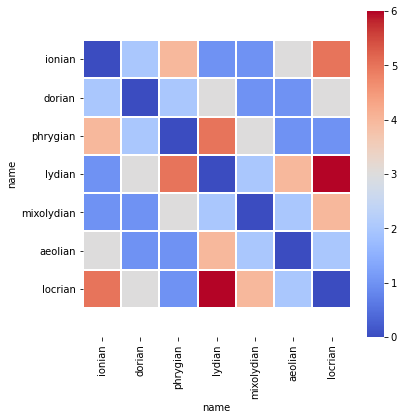

In [9]:
plt.figure(figsize=(6, 6))
sns.heatmap(pairwise_df, cmap='coolwarm', linewidth=1);
plt.axis('equal')
# TODO: Use bqplot to do something interactive - maybe listen to the modes while hovering.

# bqplot
# labels = mode_df['name'].to_list()

# fig = plt.figure(layout=widgets.Layout(width='600px', height='600px'),
#                  min_aspect_ratio=1, max_aspect_ratio=1, padding_y=0)

# plt.scales(scales={'color': bq.ColorScale(scheme='RdBu', reverse=True)})
# hm = plt.heatmap(color=pairwise_df, x=labels, y=labels, layout={'height':'300px', 'width':'300px'})
# fig

Let's notice a few things about this figure.

All of the diagonal elements are blue.
This is because the distance from any mode to itself is zero (this makes good sense).

Another thing to notice is that there seems to be a fair amount of blue.
That means modes tend to be closer to one another.

We might also note some of the larger distances.
For example, the greatest distance is between locrian and lydian.
Ionian-locrian and phyrgian-lydian are also pretty far apart.

## We can also think about differences in a more detailed sense.

In the previous notion of distance, we ignored the specific source of the distance.
For example, a difference in the third note of the scale would be treated the same as a difference in the seventh.
Let's track these differences here.
To do that, we'll focus on one particular mode as the "base mode" - ionian for now.
We'll compare each note of each mode to this base mode.

In [10]:
c = np.stack(mode_df['cumul pattern'].values)
c

array([[ 2,  4,  5,  7,  9, 11, 12],
       [ 2,  3,  5,  7,  9, 10, 12],
       [ 1,  3,  5,  7,  8, 10, 12],
       [ 2,  4,  6,  7,  9, 11, 12],
       [ 2,  4,  5,  7,  9, 10, 12],
       [ 2,  3,  5,  7,  8, 10, 12],
       [ 1,  3,  5,  6,  8, 10, 12]])

In [11]:
# Compare each scale degree with this "base mode".
comparison_mode_ind = 0 # Choose ionian

comparison_mode = copy.copy(c[comparison_mode_ind])

for mode_ind in range(c.shape[0]):
    c[mode_ind, :] = (c[mode_ind, :] == comparison_mode)
    
c

array([[1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 0, 1],
       [0, 0, 1, 1, 0, 0, 1],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1]])

(0.0, 7.0, 7.0, 0.0)

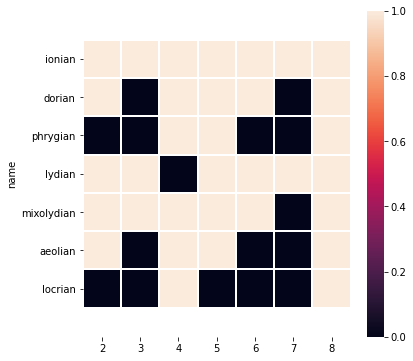

In [12]:
c = pd.DataFrame(c, columns=[2, 3, 4, 5, 6, 7, 8], 
                           index=mode_df['name'])

plt.figure(figsize=(6, 6))
#sns.heatmap(c, linewidth=1)
sns.heatmap(c, linewidth=1)
plt.axis('equal')

## How do we interpret this?

In order to be comparable, we start each mode on the same note (e.g., C).
The first degree is the same by definition, and so we don't include it.
We do choose to include the eighth degree even though they are all the same here.
We could imagine some other set of tones where the eighth tone does not agree.
For example, a diminished scale would attain the upper C, but it would be the 9th note, not the eighth.

Note that every scale degree of ionian agrees with (the base mode) ionian - no surprise.

Dorian differs at the third degree (minor vs major) as well as the seventh (dominant vs major).

Locrian is the furthest from ionian.

## Apply this method to all modes (as base modes).

We just compared all modes to the base mode ionian.
Now let's do the same thing using dorian as a base mode, then phrygian, then...

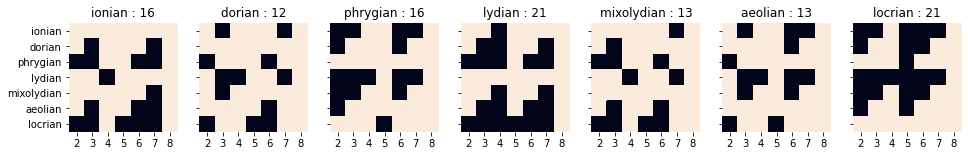

In [13]:
c = np.stack(mode_df['cumul pattern'].values)

def get_bool_grid(c, mode_df, ind):
    cbool = np.zeros_like(c, dtype=bool)
    comparison_mode = copy.copy(c[ind, :])

    for mode_ind in range(c.shape[0]):
        cbool[mode_ind, :] = (c[mode_ind, :] == comparison_mode)

    return pd.DataFrame(cbool, columns=[2, 3, 4, 5, 6, 7, 8], 
                               index=mode_df['name'])


fig, axn = plt.subplots(1, 7, sharex=True, sharey=True, figsize=(16, 3))
#cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    
    if i < c.shape[0]:
        df = get_bool_grid(c, mode_df, i)
        sns.heatmap(df, ax=ax,
                    cbar=False,
                    #cbar=i == 0,
                    #cbar_ax=None if i else cbar_ax, 
                   square=True)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_title("{} : {}".format(mode_df['name'][i], c.shape[0]**2 - df.to_numpy().sum()))
    else:
        fig.delaxes(ax)

## How do we interpret this?

At the top of each plot, we list the comparison mode.
Next to the comparison mode, we list the total number of differences (number of black squares).

For example, the parent mode dorian has only 12 differences (black squares).
This is the smallest of all the numbers.
The highest numbers are held by lydian and locrian.
This means that dorian is "in the middle" in some sense and lydian and locrian are "near the edge".

This gives us a hint about a reasonable **geometry of modes**.

Lydian and locrian are (all told) generally the farthest away.
Dorian (and also mixolydian and phrygian) are generally the closest.

A reasonable first guess it to try to arrange things in a line with lydian and locrian on the ends, dorian in the middle, and the others nearby.

## Can we make this geometry constructive?

First, a digression:

----------------
### How do you turn distances into geometry anyway??

Imagine you have two objects A and B and you know the distance between them (say 5 meters).
Then you can arrange A and B in a straight line 5 meters apart, and this is a faithful representation of the distances.
Two objects are embedded in a one-dimensional space.
We took knowledge of distances (here there was just one) and turned this into a geometric representation - the two points A and B separated by a straight line 5 meters long - no problem.

Next, imagine you have three objects A, B and C.
Let's say the distances are A to B is 5, B to C is 5 and A to C is 6.
There is no way to arrange A, B, and C in a straight line such that these three distances are respected.
We must make use of the plane and arrange them in a triangle.
These three objects are embedded in the two-dimensional plane.
Again we took knowledge of distances (3 numbers) and turned this into a geometric representation - a triangle.

However, imagine that the previous distances were instead 5, 6 and 11, then we *could* have arranged them in a straight line.
We would not have required use of the more general two-dimensional plane.
But this situation is a lucky one - it requires that the third distance is exactly equal to the sum of the other two.

Getting a triangle from 3 distances is not hard for us to imagine, so maybe the distances and geometry seem like almost the same thing - it may be hard to even think about three points without visualizing a triangle.
However if we continued this exploration, we would find that $N$ objects with "random" distances between pairs will require $N-1$ dimensions.
Thinking in any dimension greater than 3 is pretty difficult!
So here it really does make sense for us to first conceive of the distances (we go out with our ruler and measure pairwise distances 1000 times).
Then we come to the computer and ask, "How can we represent these distances in a meaningful way?"

If we have 100 points, will our object require 99 dimensions?
Or is there some structure that allows us to use only 2?

Also, what happens if, strictly speaking, these distances do not permit any dimension less than 99, however if we allow ourselves a little fudging, we can get them into 2 dimensions with only a small distortion.
That would probably be worth it, right?

Hopefully we are now understand this process a little and are motivated to make use of it.

----------------

Now let's return to our original distance matrix.
There are 7 objects.
In general this will require a 6-dimensional space.
This is hard to visualize and maybe not that useful.
It would be nice if we could get away with a lower dimension...

Let's find out!

## sklearn

`sklearn` or scikit-learn is the go-to machine learning package in Python.

We will make use of "multi-dimensional scaling" (MDS) to convert our pairwise-distances to a geometric arrangement.

We will then use PCA to rotate this arrangement so that it is in a convenient orientation.

In [202]:
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

In [204]:
seed = np.random.RandomState(seed=234)

mds = MDS(n_components=2, max_iter=10**3, eps=1e-9, random_state=seed, dissimilarity="precomputed", verbose=0)
results = mds.fit(pairwise_df.values)
coords = results.embedding_

clf = PCA(n_components=2)
coords = clf.fit_transform(coords)

(-3.2998351223679134,
 3.2998368233340143,
 -0.027289516556660356,
 0.03805028842441836)

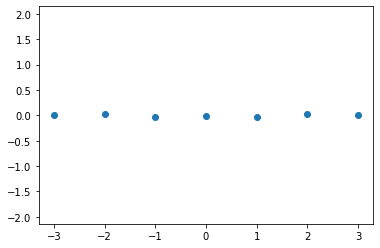

In [205]:
plt.scatter(coords[:, 0], coords[:, 1], marker = 'o')
plt.axis('equal')

# A straight line!

Notice that the geometric construction is just a straight line.

(btw, I agree.. that was a heck of a lot of work for a straight line..)

Let's go back and look at the matrix to confirm that this straight line agrees with our constraints.

In [206]:
pairwise_df

name,ionian,dorian,phrygian,lydian,mixolydian,aeolian,locrian
name,,,,,,,
ionian,0.0,2.0,4.0,1.0,1.0,3.0,5.0
dorian,2.0,0.0,2.0,3.0,1.0,1.0,3.0
phrygian,4.0,2.0,0.0,5.0,3.0,1.0,1.0
lydian,1.0,3.0,5.0,0.0,2.0,4.0,6.0
mixolydian,1.0,1.0,3.0,2.0,0.0,2.0,4.0
aeolian,3.0,1.0,1.0,4.0,2.0,0.0,2.0
locrian,5.0,3.0,1.0,6.0,4.0,2.0,0.0


If we make assign the modes to the linear geometry in the following arrangement:

TODO: Figure out how to make this assignment automatically.

(lydian --- ionian --- mixolydian --- dorian --- aeolian --- phrygian --- locrian)

where each "---" is one unit of distance, then we see that all of the pairwise distance requirements are met.

For example, from the table, we see that the distance from dorian to lydian should be 3 units.
Looking at our linear arrangement, we see that in fact dorian and lydian are 3 units apart.

# Did we reinvent the wheel?

If you are familiar with music theory, you might notice that these modes correspond to the cycle of fifths.
Within the context of the white notes, lydian starts on F, ionian on C, mixolydian on G, ... and on up by fifths.

I propose that we did not.
I propose that this coincidence between the geometry of the modes and the cycle of fifths is somewhat of an accident.

I'd like to do some investigating and see if we can come up with an argument either way.